In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load the cancer data

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(data=cancer["data"], columns=cancer["feature_names"])
df["target"] = cancer["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape

(569, 31)

In [6]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## EDA

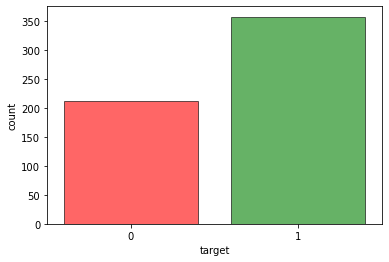

In [7]:
# 1 : benign
# 2 : malignant
sns.countplot(data=df, x="target", saturation=1, alpha=0.6, edgecolor="black", palette={1: "green", 0: "red"});

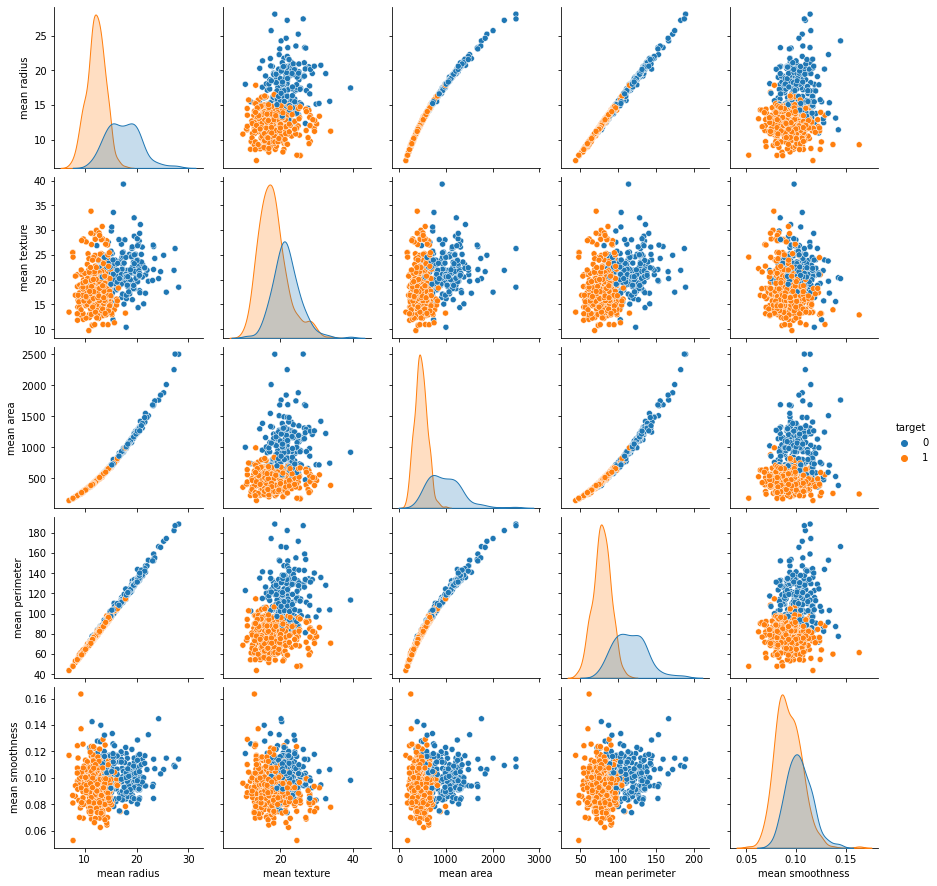

In [8]:
sns.pairplot(data=df, hue="target",
             vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness']);

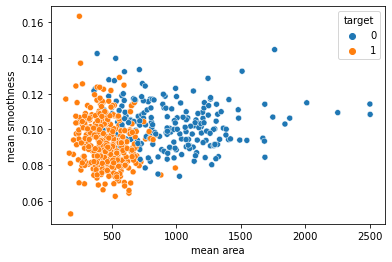

In [9]:
sns.scatterplot(data=df, x="mean area", y="mean smoothness", hue="target");

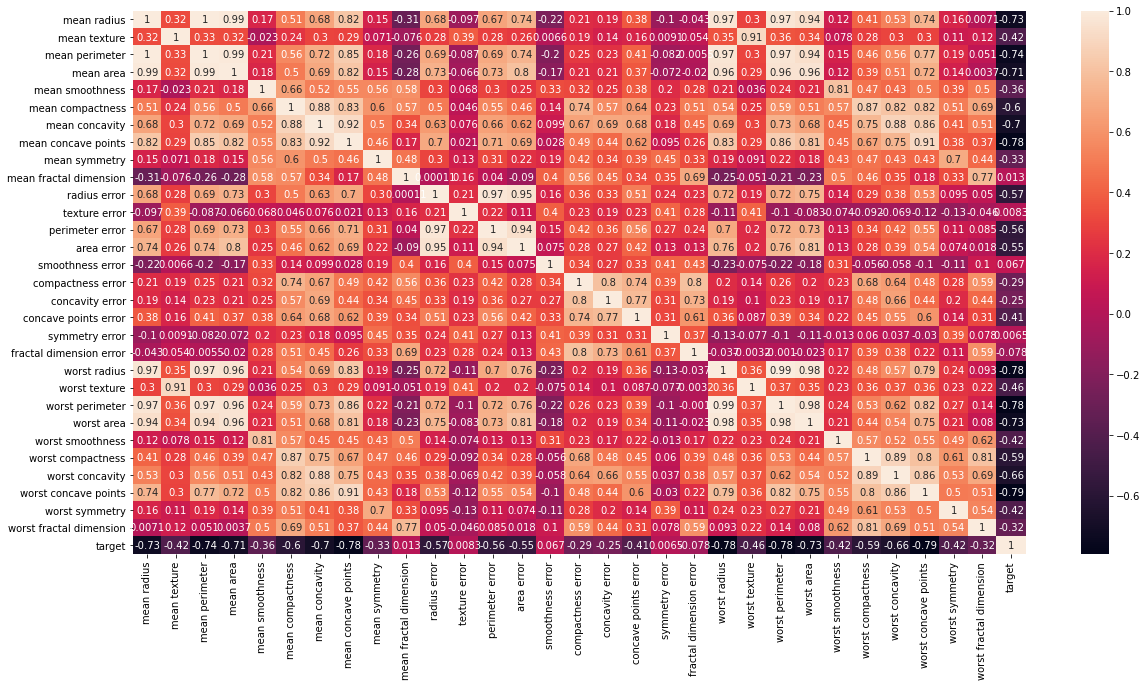

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=df.corr(), annot=True);

## Model Training

In [11]:
X = df.drop(columns="target").to_numpy()
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
y = df["target"].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train, y_train)

SVC()

## Evaluate the Model

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        54
           1       0.89      1.00      0.94        89

    accuracy                           0.92       143
   macro avg       0.95      0.90      0.91       143
weighted avg       0.93      0.92      0.92       143

0.9230769230769231
[[43 11]
 [ 0 89]]


In [16]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=clf_svm, X=X_train, y=y_train, cv=10)
print(accuracies)
print(f"Mean: {accuracies.mean() * 100} %")
print(f"Std: {accuracies.std() * 100} %")

[0.90697674 0.86046512 0.88372093 0.88372093 0.95348837 0.88372093
 0.9047619  0.95238095 0.92857143 0.95238095]
Mean: 91.10188261351053 %
Std: 3.221815884744899 %


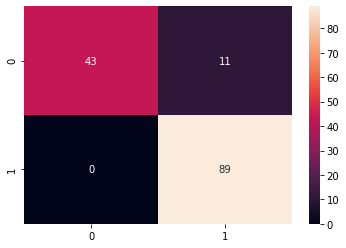

In [17]:
# 13 + 1 are misclassificed
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True);

## Improve Model Results

###### Way 1, Data Normalization (Feature Scaling)

In [18]:
X = df.drop(columns="target").to_numpy()
y = df["target"].to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.99      0.98      0.98        87

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791
[[55  1]
 [ 2 85]]


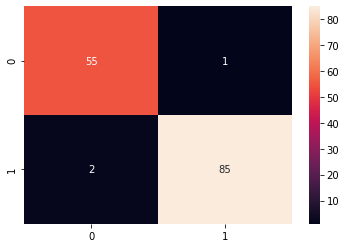

In [19]:
# 2 + 2 are misclassificed
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True);

In [20]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=clf_svm, X=X_train, y=y_train, cv=10, verbose=1) # cv = k = 10
print(accuracies)
print(f"Mean: {accuracies.mean() * 100} %")
print(f"Std: {accuracies.std() * 100} %")

[1.         1.         1.         0.95348837 0.93023256 0.95348837
 0.97619048 1.         1.         0.95238095]
Mean: 97.6578073089701 %
Std: 2.5578818430754415 %


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


###### Way 2, SVM HyperParameters Optimzation from up (Feature Scaling)

In [21]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
            "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

grid_search = GridSearchCV(estimator=clf_svm, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=10, verbose=1)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_index_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
SVC(C=10, gamma=0.01)
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.9813399778516058
10
Wall time: 3.66 s


###### grid_serch里最好的参数 ((和grid里面score不一样))

In [22]:
grid_predictions = grid_search.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.99      0.97      0.98        87

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

0.972027972027972
[[55  1]
 [ 3 84]]


###### 手动调最好的参数 (和grid里面score不一样)

In [23]:
X = df.drop(columns="target").to_numpy()
y = df["target"].to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.svm import SVC

clf_svm = SVC(C=10, gamma=0.01, kernel='rbf')
clf_svm.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        62
           1       0.93      1.00      0.96        81

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958
[[56  6]
 [ 0 81]]


###### SVM 每次的score的都不一样